## Implementation

# Data Understanding



Import Libraries
 

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import heapq
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [140]:
data = pd.read_csv("Data.csv",nrows=114)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,110,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.0,7.0,Gold,10,17,5
110,111,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Gold,10,17,7
111,112,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Green,10,17,7
112,113,Ahmed Nasser,Male,CS,Senior Student,21,5.0,4.0,4.0,2.0,...,8.0,8.0,9.0,10.0,5.0,8.0,Gold,10,11,17


In [141]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 114 non-null    int64  
 1   Name               114 non-null    object 
 2   Gender             114 non-null    object 
 3   Field              114 non-null    object 
 4   Occupation         114 non-null    object 
 5   Age                114 non-null    int64  
 6   Openness           114 non-null    float64
 7   Extraversion       114 non-null    float64
 8   Agreeableness      114 non-null    float64
 9   Conscientiousness  114 non-null    float64
 10  Neuroticism        114 non-null    float64
 11  Interface_1        114 non-null    float64
 12  Interface_2        114 non-null    float64
 13  Interface_3        114 non-null    float64
 14  Interface_4        114 non-null    float64
 15  Interface_5        114 non-null    float64
 16  Interface_6        114 non

In [143]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Interface_18         6.140351
Interface_19         6.140351
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [144]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [145]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [146]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [147]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [148]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,57.500000,21.947368,4.052632,3.342105,3.552632,2.609649,3.399123,6.938596,6.190351,6.117544,...,7.495614,6.583333,6.600877,7.162281,7.958772,6.267290,6.207477,9.578947,10.692982,10.535088
std,33.052988,5.664424,0.831803,1.219886,0.875852,1.393345,1.205041,1.697396,1.931022,1.973463,...,1.899762,2.213111,2.254965,1.646256,1.836205,2.070901,2.015063,4.569802,5.318405,5.409235
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,29.250000,20.250000,3.625000,2.625000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,7.000000,5.000000,6.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000
50%,57.500000,21.000000,4.000000,3.000000,4.000000,2.000000,4.000000,7.000000,6.000000,6.000000,...,8.000000,7.000000,7.000000,7.000000,8.000000,6.267290,6.353738,10.000000,11.000000,10.000000
75%,85.750000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.750000,7.000000,...,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,13.000000,16.000000,16.000000
max,114.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,19.000000,19.000000


In [149]:
data.value_counts('Test_Score')

Test_Score
Gold      34
Blue      32
Orange    28
Green     20
dtype: int64

# Statistical analysis

In [150]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
Id,1.000000,-0.120000,0.070000,-0.050000,0.070000,-0.180000,0.100000,0.020000,0.010000,0.000000,0.100000,-0.020000,-0.040000,-0.010000,0.060000,0.020000,0.190000,-0.010000,0.030000,0.100000,-0.140000,-0.120000,-0.020000,0.070000,0.080000,0.050000,0.060000,-0.010000,-0.090000
Age,-0.120000,1.000000,-0.010000,0.190000,0.190000,0.210000,0.020000,0.060000,0.040000,0.010000,0.130000,0.020000,0.100000,-0.010000,0.040000,0.040000,-0.100000,-0.020000,0.010000,0.020000,0.160000,0.170000,0.070000,-0.050000,0.120000,0.040000,0.020000,0.080000,0.030000
Openness,0.070000,-0.010000,1.000000,0.280000,0.080000,0.150000,0.020000,0.030000,0.050000,0.110000,0.100000,0.230000,0.100000,0.080000,0.110000,-0.020000,0.190000,0.040000,0.100000,0.180000,0.000000,-0.050000,0.160000,0.060000,0.070000,0.010000,0.120000,-0.170000,-0.080000
Extraversion,-0.050000,0.190000,0.280000,1.000000,0.150000,0.120000,-0.050000,0.010000,0.190000,0.110000,0.250000,0.120000,0.110000,0.010000,0.020000,0.050000,0.010000,0.110000,0.070000,0.030000,0.090000,0.050000,0.190000,-0.070000,0.160000,-0.080000,-0.050000,-0.030000,0.030000
Agreeableness,0.070000,0.190000,0.080000,0.150000,1.000000,0.060000,0.150000,0.060000,0.090000,0.030000,0.040000,0.050000,-0.030000,-0.090000,-0.030000,0.060000,-0.190000,0.010000,0.010000,-0.060000,-0.020000,0.000000,0.060000,-0.050000,0.060000,-0.020000,-0.040000,-0.120000,-0.020000
Conscientiousness,-0.180000,0.210000,0.150000,0.120000,0.060000,1.000000,0.030000,0.180000,0.190000,0.090000,0.030000,0.060000,0.140000,0.030000,0.040000,0.140000,-0.030000,0.210000,0.020000,0.160000,0.190000,0.110000,0.100000,0.150000,-0.010000,0.000000,-0.040000,-0.000000,0.100000
Neuroticism,0.100000,0.020000,0.020000,-0.050000,0.150000,0.030000,1.000000,0.240000,0.150000,0.250000,0.170000,0.160000,0.060000,0.060000,0.010000,0.100000,0.250000,0.120000,0.190000,0.160000,-0.040000,-0.010000,0.020000,0.040000,0.100000,0.080000,-0.160000,-0.200000,0.010000
Interface_1,0.020000,0.060000,0.030000,0.010000,0.060000,0.180000,0.240000,1.000000,0.700000,0.750000,0.400000,0.480000,0.230000,0.130000,0.100000,0.120000,0.180000,0.550000,0.410000,0.240000,0.200000,0.300000,0.250000,0.350000,0.280000,0.250000,-0.310000,-0.340000,-0.200000
Interface_2,0.010000,0.040000,0.050000,0.190000,0.090000,0.190000,0.150000,0.700000,1.000000,0.720000,0.390000,0.430000,0.310000,0.290000,0.240000,0.270000,0.200000,0.400000,0.330000,0.250000,0.260000,0.330000,0.250000,0.300000,0.350000,0.200000,-0.370000,-0.350000,-0.100000
Interface_3,0.000000,0.010000,0.110000,0.110000,0.030000,0.090000,0.250000,0.750000,0.720000,1.000000,0.300000,0.390000,0.310000,0.210000,0.120000,0.140000,0.250000,0.460000,0.380000,0.230000,0.170000,0.260000,0.220000,0.330000,0.300000,0.180000,-0.300000,-0.280000,-0.220000


# get dynamic the highest and lowest interfaces along all the personalities

In [151]:
data_1= data[data.columns[11:31]]


In [152]:
import heapq

In [153]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(4, means_Green)
lowest_green = heapq.nsmallest(4, means_Green)

means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(4, means_Blue)
lowest_blue = heapq.nsmallest(4, means_Blue)


means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(4, means_Gold)
lowest_gold = heapq.nsmallest(4, means_Gold)


means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(4, means_Orange)
lowest_orange = heapq.nsmallest(4, means_Orange)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [154]:
def get_index(array1,array2,full_array):
    high1,high2,high3,high4=array1
    low1,low2,low3,low4=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_high4=full_array.index(high4)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    index_low4=full_array.index(low4)
    return index_high1,index_high2,index_high3,index_high4,index_low1,index_low2,index_low3,index_low4

In [155]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
Green_values


(9, 16, 12, 6, 7, 8, 11, 5)

In [156]:
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [157]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [158]:
selected_factors

[0, 2, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18]

In [159]:
All_factors = [*selected_factors]
selected_interfaces = data_1.iloc[:, All_factors]


In [160]:
selected_interfaces['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_8068\2108893319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_interfaces['Test_Score']=data_1.iloc[:,-1]


In [161]:
Interfaces=selected_interfaces

In [162]:
Interfaces['Interface_3'] = selected_interfaces['Interface_3'].apply(lambda x: 1 if x >= 6 else 0) 
Interfaces['Interface_19'] = selected_interfaces['Interface_19'].apply(lambda x: 1 if x >= 6 else 0) 

Interfaces['Interface_6'] = selected_interfaces['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_8'] = selected_interfaces['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_9'] = selected_interfaces['Interface_9'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_12'] = selected_interfaces['Interface_12'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_18'] = selected_interfaces['Interface_18'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_7'] = selected_interfaces['Interface_7'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_10'] = selected_interfaces['Interface_10'].apply(lambda x: 1 if x >= 6 else 0) 
Interfaces['Interface_1'] = selected_interfaces['Interface_1'].apply(lambda x: 1 if x >= 6 else 0) 
Interfaces['Interface_11'] = selected_interfaces['Interface_11'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_13'] = selected_interfaces['Interface_13'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_16'] = selected_interfaces['Interface_16'].apply(lambda x: 1 if x >= 6 else 0)   
Interfaces['Interface_17'] = selected_interfaces['Interface_17'].apply(lambda x: 1 if x >= 6 else 0)  


C:\Users\HP\AppData\Local\Temp\ipykernel_8068\4046721658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Interface_3'] = selected_interfaces['Interface_3'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_8068\4046721658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Interface_19'] = selected_interfaces['Interface_19'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_8068\4046721658.py:4: SettingWithCopyWarning: 
A valu

# Machine learning using All interfaces

In [163]:
New=data[data.columns[6:31]]
New['Test_Score'] = pd.factorize(New['Test_Score'])[0]



C:\Users\HP\AppData\Local\Temp\ipykernel_8068\4037034807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Test_Score'] = pd.factorize(New['Test_Score'])[0]


In [164]:
y = New['Test_Score']
y
x = New.drop(['Test_Score'],axis = 1)
x
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)


In [165]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100


26.08695652173913

In [166]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
accuracy_score(y_test, y_pred_KNN)*100

30.434782608695656

In [167]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test,y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


39.130434782608695

# Array of personality in 1s and 0s

In [168]:
y=np.full([len(Interfaces['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(Interfaces['Test_Score'])):
    if Interfaces['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif Interfaces['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif Interfaces['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


In [169]:

x=Interfaces[Interfaces.columns[:14]].values
y=y1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

41.75824175824176
acc of KNN %  8.695652173913043
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.09      0.14        11
           2       0.12      0.25      0.17         4
           3       0.00      0.00      0.00         3

   micro avg       0.13      0.09      0.11        23
   macro avg       0.11      0.09      0.08        23
weighted avg       0.18      0.09      0.10        23
 samples avg       0.09      0.09      0.09        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GReen

In [170]:
dummy_df = pd.get_dummies(Interfaces, columns=['Test_Score'])

In [241]:
Green_data=dummy_df
Green_data

,Interface_1,Interface_3,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0
1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0
3,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0
4,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0
110,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
111,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
112,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0


In [277]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [317]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:8]].values

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [175]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



65.21739130434783
F-score               precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.00      0.00      0.00         5

    accuracy                           0.65        23
   macro avg       0.38      0.42      0.39        23
weighted avg       0.59      0.65      0.62        23



In [318]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


83.51648351648352
73.91304347826086
F-score               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.00      0.00      0.00         5

    accuracy                           0.74        23
   macro avg       0.39      0.47      0.42        23
weighted avg       0.60      0.74      0.67        23



In [307]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

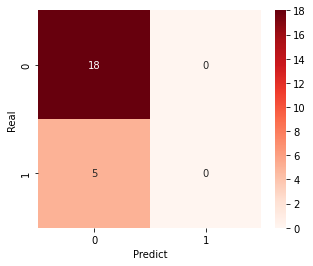

In [178]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [179]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.00      0.00      0.00         5

    accuracy                           0.74        23
   macro avg       0.39      0.47      0.42        23
weighted avg       0.60      0.74      0.67        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Blue 

In [282]:
Blue_data= dummy

In [283]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [319]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:8]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [183]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100
print("F-score",classification_report(y_test, y_pred_tree))

F-score               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.56      0.45      0.50        11

    accuracy                           0.57        23
   macro avg       0.56      0.56      0.56        23
weighted avg       0.56      0.57      0.56        23



In [320]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

75.82417582417582
acc of KNN %  52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.50      0.45      0.48        11

    accuracy                           0.52        23
   macro avg       0.52      0.52      0.52        23
weighted avg       0.52      0.52      0.52        23



In [321]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,1
1,1,0
2,0,1
3,0,1
4,0,0
5,1,1
6,1,0
7,0,0
8,0,1
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

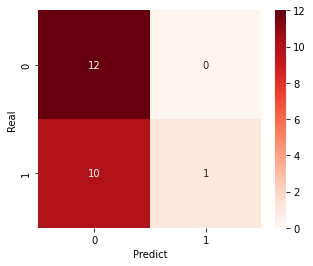

In [186]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [187]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))

F-score               precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.40      0.18      0.25        11

    accuracy                           0.48        23
   macro avg       0.45      0.47      0.43        23
weighted avg       0.45      0.48      0.43        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# GOld

In [286]:
Gold_data= dummy

In [287]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)


In [322]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:8]].values


In [323]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [192]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

print("F-score",classification_report(y_test, y_pred_tree))

56.52173913043478
F-score               precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.00      0.00      0.00         4

    accuracy                           0.57        23
   macro avg       0.38      0.34      0.36        23
weighted avg       0.63      0.57      0.60        23



In [324]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

71.42857142857143
73.91304347826086
F-score               precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.00      0.00      0.00         4

    accuracy                           0.74        23
   macro avg       0.40      0.45      0.43        23
weighted avg       0.67      0.74      0.70        23



In [325]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,1


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

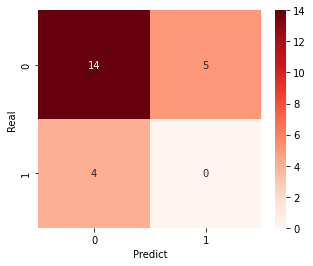

In [195]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [196]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))

F-score               precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.17      0.25      0.20         4

    accuracy                           0.65        23
   macro avg       0.50      0.49      0.49        23
weighted avg       0.71      0.65      0.68        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Orange

In [292]:
Orange_data= dummy

In [293]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)


In [328]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:8]].values

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=0)


In [201]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100
print("F-score",classification_report(y_test, y_pred_tree))

F-score               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.40      0.67      0.50         3

    accuracy                           0.83        23
   macro avg       0.67      0.76      0.70        23
weighted avg       0.87      0.83      0.84        23



In [329]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

In [330]:
knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)

In [331]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN = knn_model.predict(x_test)


print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

68.13186813186813
60.86956521739131
acc of KNN %  60.86956521739131
F-score               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.00      0.00      0.00         3

    accuracy                           0.61        23
   macro avg       0.41      0.35      0.38        23
weighted avg       0.72      0.61      0.66        23



In [332]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check


,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
5,0,0
6,0,1
7,0,0
8,1,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Actual')]

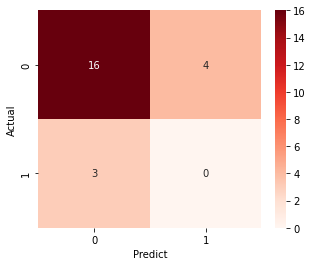

In [206]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Actual")

In [207]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))

F-score               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.40      0.67      0.50         3

    accuracy                           0.83        23
   macro avg       0.67      0.76      0.70        23
weighted avg       0.87      0.83      0.84        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Vector
 all interfaces in one array 

In [208]:
y=New['Test_Score']
x=Interfaces[Interfaces.columns[:14]].values

In [209]:
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
weights = {0:0.19,1:0.26,2:0.31,3:0.25}
tree=DecisionTreeClassifier(class_weight=weights)
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

21.73913043478261

[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

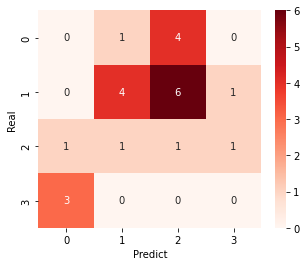

In [210]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [211]:
# score 0,1,2,3, test_score using Knn 

x = Interfaces[Interfaces.columns[:14]].values
x
Y= New['Test_Score']
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

49.45054945054945
39.130434782608695
F-score               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      0.45      0.50        11
           2       0.12      0.25      0.17         4
           3       0.40      0.67      0.50         3

    accuracy                           0.39        23
   macro avg       0.52      0.39      0.38        23
weighted avg       0.56      0.39      0.41        23



In [212]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

43.956043956043956


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


17.391304347826086

In [213]:
# string test_score using Knn 

x = Interfaces[Interfaces.columns[:14]].values
x
Y= Interfaces['Test_Score']
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))



48.35164835164835
39.130434782608695
F-score               precision    recall  f1-score   support

        Blue       0.56      0.45      0.50        11
        Gold       0.12      0.25      0.17         4
       Green       1.00      0.20      0.33         5
      Orange       0.40      0.67      0.50         3

    accuracy                           0.39        23
   macro avg       0.52      0.39      0.38        23
weighted avg       0.56      0.39      0.41        23



In [214]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
33,Gold,Blue
10,Blue,Blue
90,Green,Gold
7,Gold,Gold
24,Orange,Orange
73,Blue,Gold
113,Blue,Blue
22,Gold,Blue
94,Orange,Gold
2,Green,Gold


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

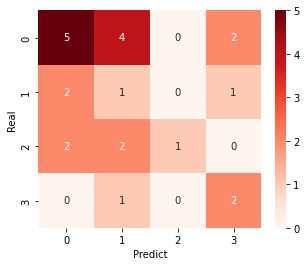

In [215]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Cross tab 

In [216]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_13'], margins=True)


Interface_13,0,1,All
Test_Score,,,
Blue,3,29,32
Gold,4,30,34
Green,3,17,20
Orange,6,22,28
All,16,98,114


In [217]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_7'], margins=True)

Interface_7,0,1,All
Test_Score,,,
Blue,5,27,32
Gold,6,28,34
Green,2,18,20
Orange,6,22,28
All,19,95,114


In [218]:
pd.crosstab(index=Interfaces['Interface_13'], columns=Interfaces['Interface_7'], margins=True)

Interface_7,0,1,All
Interface_13,,,
0,5,11,16
1,14,84,98
All,19,95,114


In [219]:
pd.crosstab(index=Interfaces['Interface_8'], columns=Interfaces['Interface_17'], margins=True)

Interface_17,0,1,All
Interface_8,,,
0,8,55,63
1,3,48,51
All,11,103,114


In [220]:
pd.crosstab(index=Interfaces['Interface_9'], columns=Interfaces['Interface_11'], margins=True)

Interface_11,0,1,All
Interface_9,,,
0,17,50,67
1,5,42,47
All,22,92,114


In [221]:
pd.crosstab(index=Interfaces['Interface_1'], columns=Interfaces['Interface_16'], margins=True)

Interface_16,0,1,All
Interface_1,,,
0,7,16,23
1,11,80,91
All,18,96,114


# Cross tab lowest

In [222]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_3'], margins=True)

Interface_3,0,1,All
Test_Score,,,
Blue,11,21,32
Gold,14,20,34
Green,7,13,20
Orange,11,17,28
All,43,71,114


In [223]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_6'], margins=True)

Interface_6,0,1,All
Test_Score,,,
Blue,16,16,32
Gold,17,17,34
Green,8,12,20
Orange,9,19,28
All,50,64,114


In [224]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_8'], margins=True)

Interface_8,0,1,All
Test_Score,,,
Blue,21,11,32
Gold,21,13,34
Green,9,11,20
Orange,12,16,28
All,63,51,114


In [225]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_9'], margins=True)

Interface_9,0,1,All
Test_Score,,,
Blue,19,13,32
Gold,23,11,34
Green,9,11,20
Orange,16,12,28
All,67,47,114


In [226]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_12'], margins=True)

Interface_12,0,1,All
Test_Score,,,
Blue,10,22,32
Gold,10,24,34
Green,9,11,20
Orange,12,16,28
All,41,73,114


In [227]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_19'], margins=True)

Interface_19,0,1,All
Test_Score,,,
Blue,12,20,32
Gold,8,26,34
Green,6,14,20
Orange,8,20,28
All,34,80,114


In [228]:
pd.crosstab(index=Interfaces['Test_Score'], columns=Interfaces['Interface_18'], margins=True)

Interface_18,0,1,All
Test_Score,,,
Blue,10,22,32
Gold,7,27,34
Green,8,12,20
Orange,13,15,28
All,38,76,114


# *8* Interfaces to KNN

In [262]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(3, means_Green)
lowest_green = heapq.nsmallest(3, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(3, means_Blue)
lowest_blue = heapq.nsmallest(3, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(3, means_Gold)
lowest_gold = heapq.nsmallest(3, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(3, means_Orange)
lowest_orange = heapq.nsmallest(3, means_Orange)

In [264]:
def get_index(array1,array2,full_array):
    high1,high2,high3=array1
    low1,low2,low3=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    return index_high1,index_high2,index_high3,index_low1,index_low2,index_low3

In [265]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [266]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [267]:
selected_factors

[5, 7, 8, 9, 10, 11, 12, 16]

In [269]:
All_factors = [*selected_factors]
New_factors = data_1.iloc[:, All_factors]
# New_factors['Test_Score']=data_1.iloc[:,-1]


In [270]:
Factors=New_factors
Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17
0,4.0,6.0,6.0,8.0,6.0,7.0,8.0,6.0
1,9.0,5.0,3.0,8.0,8.0,7.0,9.0,8.0
2,8.0,6.0,5.0,9.0,8.0,6.0,8.0,9.0
3,5.0,5.0,4.0,5.5,6.0,6.5,7.5,7.5
4,7.0,5.0,8.0,7.0,6.0,4.0,8.0,8.0
...,...,...,...,...,...,...,...,...
109,8.0,7.5,8.0,9.0,7.0,5.0,7.0,9.0
110,2.0,1.0,2.0,8.0,3.0,2.0,7.0,8.0
111,2.0,1.0,2.0,8.0,3.0,2.0,7.0,8.0
112,6.0,6.0,5.0,10.0,10.0,7.0,9.0,10.0


In [271]:
Factors['Interface_6'] = New_factors['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_8'] = New_factors['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_9'] = New_factors['Interface_9'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_12'] = New_factors['Interface_12'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_10'] = New_factors['Interface_10'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_11'] = New_factors['Interface_11'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_13'] = New_factors['Interface_13'].apply(lambda x: 1 if x >= 6 else 0)   
Factors['Interface_17'] = New_factors['Interface_17'].apply(lambda x: 1 if x >= 6 else 0)  


C:\Users\HP\AppData\Local\Temp\ipykernel_8068\961762804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Interface_6'] = New_factors['Interface_6'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_8068\961762804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Interface_8'] = New_factors['Interface_8'].apply(lambda x: 1 if x >= 6 else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_8068\961762804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [272]:

Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17
0,0,1,1,1,1,1,1,1
1,1,0,0,1,1,1,1,1
2,1,1,0,1,1,1,1,1
3,0,0,0,0,1,1,1,1
4,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1
110,0,0,0,1,0,0,1,1
111,0,0,0,1,0,0,1,1
112,1,1,0,1,1,1,1,1


In [274]:
Factors['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_8068\2639090068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Test_Score']=data_1.iloc[:,-1]


In [239]:
x = Factors[Factors.columns[:4]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


19.78021978021978
8.695652173913043
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         4
           3       0.11      0.33      0.17         3

   micro avg       0.17      0.09      0.11        23
   macro avg       0.11      0.11      0.08        23
weighted avg       0.17      0.09      0.09        23
 samples avg       0.09      0.09      0.09        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
x = Factors[Factors.columns[:8]].values
Y= New['Test_Score']
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


ValueError: could not convert string to float: 'Blue'

In [ ]:
x = Factors[Factors.columns[:8]].values
Y= Factors['Test_Score']
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

In [ ]:
x = Factors[Factors.columns[:8]].values
x
Y= New['Test_Score']
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))

In [275]:
dummy = pd.get_dummies(New_factors, columns=['Test_Score'])

In [276]:
Green_data=dummy
Green_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1,0,1,0,0
110,0,0,0,1,0,0,1,1,0,1,0,0
111,0,0,0,1,0,0,1,1,0,0,1,0
112,1,1,0,1,1,1,1,1,0,1,0,0


# deep


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout, Dense, Flatten
from keras.models import Sequential
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:


y=np.full([len(data['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(data['Test_Score'])):
    if data['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif data['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif data['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1 

In [ ]:

x = New.drop(['Test_Score'],axis = 1)

Y= y1
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(101, activation='relu'))
model.add(tf.keras.layers.Dense(4,  activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

loss,acc_T=model.evaluate(x_test, y_test)
print("loss", loss)
print("accuracy:" , acc_T)